In [ ]:
## Data Collection Process

1. **Importing Libraries**: 
    - The first step was to import the necessary libraries such as `pandas`, `seaborn`, `BeautifulSoup`, `matplotlib.pyplot`, `requests`, `time`, and `re`. These libraries were essential for data manipulation, visualization, web scraping, and handling HTTP requests.

2. **Defining Categories**:
    - A dictionary named `categories` was created to store the product categories (e.g., Phones, Laptops) and their corresponding base URLs from the Jumia website. This allowed for easy iteration over the categories during the scraping process.

3. **Defining the Scraping Function**:
    - A function named `scrape_products` was defined to extract product details from the Jumia website. This function:
      - Loops through the first 10 pages of each category.
      - Sends HTTP GET requests to fetch the HTML content of the pages.
      - Parses the HTML using `BeautifulSoup` to extract product details such as name, price, old price, discount, rating, review count, and product type.
      - Appends the extracted details into a list of dictionaries.

4. **Scraping the Data**:
    - Using the `scrape_products` function, data for all categories was scraped by iterating over the `categories` dictionary. The scraped data was stored in a list named `data`.

5. **Saving the Data**:
    - The scraped data was converted into a pandas DataFrame for easier manipulation and analysis.
    - The DataFrame was then saved as a CSV file named `jumia_products.csv` for future use and reference.

In [2]:
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import time
import re

In [3]:
# Define categories and their URLs
categories = {
    "Phones":"https://www.jumia.co.ke/catalog/?q=phones&page=",
    "Laptops": "https://www.jumia.co.ke/catalog/?q=laptop&page=",

   
}

In [4]:
# Function to extract product details
def scrape_products(category, base_url, max_pages=20):
    products = []
    
    for page in range(1, max_pages + 1):
        url = f"{base_url}{page}"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to retrieve {category} data on page {page}")
            continue
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract product details
        for item in soup.find_all('article', class_='prd _fb col c-prd'):
            name = item.find('h3', class_='name')
            price = item.find('div', class_='prc')
            old_price = item.find('div', class_='old')
            discount = item.find('div', class_='bdg _dsct')
            rating = item.find('div', class_='stars _s')
            review_count = item.find('div', class_='rev')
            
            products.append({
                "Name": name.text.strip() if name else None,
                "Brand": name.text.split()[0] if name else None,
                "Price": price.text.strip() if price else None,
                "Old Price": old_price.text.strip() if old_price else None,
                "Discount": discount.text.strip() if discount else None,
                "Rating": rating.get('aria-label', None) if rating else None,
                "Review Count": review_count.text.strip() if review_count else None,
                "Type of Product": category
            })
        
        print(f"Scraped {category} - Page {page}")
        time.sleep(2)  # Avoid getting blocked
    
    return products

In [5]:
# Scrape all categories
data = []
for category, url in categories.items():
    print(f"Scraping {category}...")
    data.extend(scrape_products(category, url))
    time.sleep(2)  # Avoid getting blocked by the website
print('Congratulations!Scrapping Complete!!')

Scraping Phones...
Scraped Phones - Page 1
Scraped Phones - Page 2
Scraped Phones - Page 3
Scraped Phones - Page 4
Scraped Phones - Page 5
Scraped Phones - Page 6
Scraped Phones - Page 7
Scraped Phones - Page 8
Scraped Phones - Page 9
Scraped Phones - Page 10
Scraped Phones - Page 11
Scraped Phones - Page 12
Scraped Phones - Page 13
Scraped Phones - Page 14
Scraped Phones - Page 15
Scraped Phones - Page 16
Scraped Phones - Page 17
Scraped Phones - Page 18
Scraped Phones - Page 19
Scraped Phones - Page 20
Scraping Laptops...
Scraped Laptops - Page 1
Scraped Laptops - Page 2
Scraped Laptops - Page 3
Scraped Laptops - Page 4
Scraped Laptops - Page 5
Scraped Laptops - Page 6
Scraped Laptops - Page 7
Scraped Laptops - Page 8
Scraped Laptops - Page 9
Scraped Laptops - Page 10
Scraped Laptops - Page 11
Scraped Laptops - Page 12
Scraped Laptops - Page 13
Scraped Laptops - Page 14
Scraped Laptops - Page 15
Scraped Laptops - Page 16
Scraped Laptops - Page 17
Scraped Laptops - Page 18
Scraped Lap

In [6]:
# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("jumia_products.csv", index=False)
print("Scraping completed! Data saved to jumia_products.csv")

Scraping completed! Data saved to jumia_products.csv


In [7]:
df=pd.read_csv('jumia_products.csv')
df.head(1000)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",Oking,KSh 690,KSh 839,NaN,NaN,4.4 out of 5(132),Phones
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...",VILLAON,KSh 675,KSh 852,NaN,NaN,3.9 out of 5(591),Phones
2,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI,"KSh 12,399","KSh 25,000",NaN,NaN,3.8 out of 5(158),Phones
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",Infinix,"KSh 9,297","KSh 13,999",NaN,NaN,4 out of 5(58),Phones
4,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung,"KSh 10,199","KSh 12,516",NaN,NaN,4.3 out of 5(116),Phones
...,...,...,...,...,...,...,...,...
995,"Lenovo Ideapad 1, Intel Celeron N4020, 4GB RAM...",Lenovo,"KSh 32,999","KSh 37,000",NaN,NaN,NaN,Laptops
996,HP EliteBook 840 G6 Core I5 16GB RAM 512GB SSD...,HP,"KSh 41,000","KSh 55,000",NaN,NaN,5 out of 5(1),Laptops
997,HP EliteBook 830 G6 Core I5-8th Gen-8GB Ram- 2...,HP,"KSh 28,599","KSh 44,000",NaN,NaN,NaN,Laptops
998,Lenovo Yoga 11e 8GB RAM 128GB SSD Touchscreen...,Lenovo,"KSh 18,999","KSh 28,000",NaN,NaN,5 out of 5(1),Laptops


In [8]:
df.count().sum()

np.int64(8968)

In [9]:
print(df.shape)

(1600, 8)


In [10]:
df.columns

Index(['Name', 'Brand', 'Price', 'Old Price', 'Discount', 'Rating',
       'Review Count', 'Type of Product'],
      dtype='object')

In [ ]:
## EDA: Cleaning and Feature Extraction

### 1. **Cleaning Product Names**
    - **Objective**: Extract meaningful details from the product names using regex.
    - **Steps**:
      - Extracted the clean name (main product name) by removing specifications and additional details.
      - Extracted storage details (e.g., RAM, ROM, SSD, HDD) using regex patterns.
      - Extracted battery capacity (e.g., 5000mAh) and screen size (e.g., 6.7").
      - Identified product color (e.g., Black, Blue) and other remaining details.
    - **Outcome**: Created new columns such as `Clean Name`, `Storage`, `Battery`, `Screen Size`, `Color`, and `More Details`.

### 2. **Cleaning the `More Details` Column**
    - **Objective**: Remove redundant information from the `More Details` column.
    - **Steps**:
      - Removed details already extracted into other columns (e.g., storage, battery, screen size, color).
      - Cleaned up extra commas and spaces for better readability.

### 3. **Fixing Price Columns**
    - **Objective**: Convert price columns to numerical values for analysis.
    - **Steps**:
      - Removed non-numeric characters (e.g., "KSh") from the `Price` and `Old Price` columns.
      - Converted the cleaned values to integers.
      - Filled missing or zero values in the `Old Price` column with the `Price` value to ensure consistency.

### 4. **Calculating Discounts**
    - **Objective**: Calculate the discount percentage for each product.
    - **Steps**:
      - Used the formula: `((Old Price - Price) / Old Price) * 100`.
      - Rounded the discount values to two decimal places.
      - Ensured that negative discounts were set to 0%.

### 5. **Handling Ratings and Review Counts**
    - **Objective**: Extract numeric values for ratings and review counts.
    - **Steps**:
      - Extracted numeric ratings from text (e.g., "4.4 out of 5").
      - Extracted review counts from text (e.g., "(126)").
      - Filled missing values with 0 for both columns.

### 8. **Renaming Columns**
    - Renamed the `Clean Name` column to `Brand` for better clarity.

### 9. **Final DataFrame**
    - The cleaned DataFrame now includes meaningful columns such as `Brand`, `Storage`, `Battery`, `Screen Size`, `Color`, `Price`, `Old Price`, `Discount`, `Rating`, `Review Count`, and `Type of Product`.
    - This structured data is ready for further analysis and visualization.

In [11]:
#  Data Cleaning and Feature Extraction
def clean_product_name(name):
    if not isinstance(name, str):
        return None, None, None, None, None
    
    # Extract the clean name (first part before any specifications or comma)
    clean_name_match = re.match(r'^[^,]+', name)
    clean_name = clean_name_match.group(0).strip() if clean_name_match else name.strip()
    
    # Extract storage components
    storage = re.findall(r'(\d+GB\s*(?:RAM|ROM|SSD|HDD)(?:\s*\+\s*\d+GB\s*(?:ROM|SSD|HDD))?)', 
                          name, flags=re.IGNORECASE)
    storage = ', '.join(storage) if storage else "N/A"
    
    # Extract battery capacity
    battery = re.search(r'(\d+mAh)', name)
    battery = battery.group(1) if battery else "N/A"
    
    # Extract screen size
    screen_size = re.search(r'(\d+\.?\d*")', name)
    screen_size = screen_size.group(1) if screen_size else "N/A"
    
    # Remaining details (if any)
    more_details = name.replace(clean_name, '').strip()
    
    # Extract color if present
    color_match = re.search(r'(Black|Blue|Gold|Silver|Green|Red)(?=\s*\(|$)', more_details, re.IGNORECASE)
    color = color_match.group(1).title() if color_match else "N/A"
    
    return clean_name, storage, battery, screen_size, color, more_details

In [12]:
# Apply to DataFrame
df[['Clean Name', 'Storage', 'Battery', 'Screen Size', 'Color', 'More Details', 
    'Price', 'Old Price', 'Discount', 'Rating', 'Review Count', 'Type of Product']] = df.apply(
    lambda row: pd.Series(clean_product_name(row['Name']) + 
                          (row['Price'], row['Old Price'], row['Discount'], 
                           row['Rating'], row['Review Count'], row['Type of Product'])), axis=1)

# Display results
df[['Name', 'Clean Name', 'Storage', 'Battery', 'Screen Size', 'Color', 'More Details', 
    'Price', 'Old Price', 'Discount', 'Rating', 'Review Count', 'Type of Product']].head(5)

,Name,Clean Name,Storage,Battery,Screen Size,Color,More Details,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...","Oking OK310 1.7"" Wireless FM",N/A,1000mAh,"1.7""",Black,", Bright Torch, 1000mAh, Tri SIM, 2G - Black ...",KSh 690,KSh 839,NaN,NaN,4.4 out of 5(132),Phones
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...","VILLAON V101 1.77"" Kabambe",N/A,1000mAh,"1.77""",N/A,", Wireless FM, Camera, Bright Touch, Facebook,...",KSh 675,KSh 852,NaN,NaN,3.9 out of 5(591),Phones
2,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,N/A,N/A,N/A,N/A,",I12 EAR BUDS,COVER,3D.","KSh 12,399","KSh 25,000",NaN,NaN,3.8 out of 5(158),Phones
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...","Infinix Smart 8 6.6"" HD",2GB RAM,5000mAh,"6.6""",N/A,", 2GB RAM + 64GB , Android 13 (Dual Sim) 5000m...","KSh 9,297","KSh 13,999",NaN,NaN,4 out of 5(58),Phones
4,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung A05,4GB RAM,5000mAh,"6.7""",Black,", 6.7"", 4GB RAM + 64GB, 5000mAh, Black (1YR W...","KSh 10,199","KSh 12,516",NaN,NaN,4.3 out of 5(116),Phones


In [13]:
df.count().sum()

np.int64(18568)

In [14]:
print(df.shape)

(1600, 14)


In [15]:
# Function to clean redundant information from 'More Details'
def clean_more_details(row):
    details = row['More Details']
    for col in ['Storage', 'Battery', 'Screen Size', 'Color']:
        if row[col] != "N/A" and row[col] in details:
            details = details.replace(row[col], '').strip()
    # Remove extra commas and spaces
    details = re.sub(r',\s*,', ',', details)  # Remove consecutive commas
    details = re.sub(r'^\s*,|,\s*$', '', details)  # Remove leading/trailing commas
    return details.strip()

# Apply the cleaning function
df['More Details'] = df.apply(clean_more_details, axis=1)

# Drop the 'Name' column
df.drop(columns=['Name'], inplace=True)

# Rename the DataFrame to clean_df
clean_df = df.copy()

In [16]:
clean_df.head(10)

,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,Battery,Screen Size,Color,More Details
0,Oking,KSh 690,KSh 839,NaN,NaN,4.4 out of 5(132),Phones,"Oking OK310 1.7"" Wireless FM",N/A,1000mAh,"1.7""",Black,"Bright Torch, Tri SIM, 2G - (1YR WRTY)"
1,VILLAON,KSh 675,KSh 852,NaN,NaN,3.9 out of 5(591),Phones,"VILLAON V101 1.77"" Kabambe",N/A,1000mAh,"1.77""",N/A,"Wireless FM, Camera, Bright Touch, Facebook, ..."
2,XIAOMI,"KSh 12,399","KSh 25,000",NaN,NaN,3.8 out of 5(158),Phones,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,N/A,N/A,N/A,N/A,"I12 EAR BUDS,COVER,3D."
3,Infinix,"KSh 9,297","KSh 13,999",NaN,NaN,4 out of 5(58),Phones,"Infinix Smart 8 6.6"" HD",2GB RAM,5000mAh,"6.6""",N/A,"+ 64GB , Android 13 (Dual Sim) , White"
4,Samsung,"KSh 10,199","KSh 12,516",NaN,NaN,4.3 out of 5(116),Phones,Samsung A05,4GB RAM,5000mAh,"6.7""",Black,"+ 64GB, (1YR WRTY)"
5,XIAOMI,"KSh 11,299","KSh 19,999",NaN,NaN,4.1 out of 5(176),Phones,XIAOMI Redmi 14C,4GB RAM,5160mAh,"6.88""",Black,(+128GB Storage) (Dual Sim) - Midnight
6,Samsung,"KSh 9,399","KSh 14,999",NaN,NaN,4 out of 5(243),Phones,Samsung Galaxy A05,4GB RAM + 64GB ROM,5000mAh,N/A,Black,"6.7'' (Dual Sim) 50MP Camera, -"
7,XIAOMI,"KSh 11,099","KSh 14,696",NaN,NaN,4.3 out of 5(232),Phones,XIAOMI Redmi 14C,4GB RAM,5160mAh,"6.88""",Black,(+128GB Storage) (Dual Sim) - Midnight (2YRs...
8,Poco,"KSh 12,999","KSh 16,819",NaN,NaN,4.3 out of 5(119),Phones,Poco C75,6GB RAM,5160mAh,"6.88""",Black,"128GB + (Dual SIM), (2YRs WRTY)"
9,XIAOMI,"KSh 10,499","KSh 12,000",NaN,NaN,4.2 out of 5(176),Phones,XIAOMI Redmi A3x,4GB RAM,5000mAh,"6.71""",Black,"128GB + (Dual SIM), (2YRS WRTY)"


In [17]:
clean_df.count().sum()

np.int64(16968)

In [18]:
clean_df.shape

(1600, 13)

In [19]:
clean_df.columns

Index(['Brand', 'Price', 'Old Price', 'Discount', 'Rating', 'Review Count',
       'Type of Product', 'Clean Name', 'Storage', 'Battery', 'Screen Size',
       'Color', 'More Details'],
      dtype='object')

In [20]:
# Save the cleaned DataFrame to a new CSV file
clean_df.to_csv("cleaned_jumia_products.csv", index=False)
print("Data cleaning Phase 1 completed! Cleaned data saved to cleaned_jumia_products.csv")

Data cleaning Phase 1 completed! Cleaned data saved to cleaned_jumia_products.csv


In [21]:
clean_df.isnull().sum()

Brand                 0
Price                 0
Old Price            49
Discount           1600
Rating             1600
Review Count        583
Type of Product       0
Clean Name            0
Storage               0
Battery               0
Screen Size           0
Color                 0
More Details          0
dtype: int64

In [22]:
# Convert price columns to numerical values
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^\d]', '', price)  # Remove non-numeric characters
        return int(price) if price.isdigit() else None
    return price  

clean_df["Price"] = clean_df["Price"].apply(clean_price)
clean_df["Old Price"] = clean_df["Old Price"].apply(clean_price)


In [23]:
# Fix Old Price: If it's 0 or missing, set it to Price so that Discount is 0%
clean_df["Old Price"].fillna(clean_df["Price"], inplace=True)
clean_df.loc[clean_df["Old Price"] == 0, "Old Price"] = clean_df["Price"]

# Calculate discount percentage where old price is available
clean_df["Discount"] = (((clean_df["Old Price"] - clean_df["Price"]) / clean_df["Old Price"]) * 100).round(2)

clean_df.head(5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19356\1062051460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df["Old Price"].fillna(clean_df["Price"], inplace=True)


,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,Battery,Screen Size,Color,More Details
0,Oking,690,839.0,17.76,NaN,4.4 out of 5(132),Phones,"Oking OK310 1.7"" Wireless FM",N/A,1000mAh,"1.7""",Black,"Bright Torch, Tri SIM, 2G - (1YR WRTY)"
1,VILLAON,675,852.0,20.77,NaN,3.9 out of 5(591),Phones,"VILLAON V101 1.77"" Kabambe",N/A,1000mAh,"1.77""",N/A,"Wireless FM, Camera, Bright Touch, Facebook, ..."
2,XIAOMI,12399,25000.0,50.40,NaN,3.8 out of 5(158),Phones,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,N/A,N/A,N/A,N/A,"I12 EAR BUDS,COVER,3D."
3,Infinix,9297,13999.0,33.59,NaN,4 out of 5(58),Phones,"Infinix Smart 8 6.6"" HD",2GB RAM,5000mAh,"6.6""",N/A,"+ 64GB , Android 13 (Dual Sim) , White"
4,Samsung,10199,12516.0,18.51,NaN,4.3 out of 5(116),Phones,Samsung A05,4GB RAM,5000mAh,"6.7""",Black,"+ 64GB, (1YR WRTY)"


In [24]:
# Extract numeric rating and review count
clean_df["Rating"] = clean_df["Review Count"].str.extract(r'(\d+\.\d+|\d+)').astype(float, errors='ignore')
clean_df["Review Count"] = clean_df["Review Count"].str.extract(r'\((\d+)\)').astype(float, errors='ignore')

# Handle missing values
clean_df.fillna({"Price": 0, "Old Price": 0, "Discount": 0, "Rating": 0, "Review Count": 0}, inplace=True)
clean_df.head(5)


,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,Battery,Screen Size,Color,More Details
0,Oking,690,839.0,17.76,4.4,132.0,Phones,"Oking OK310 1.7"" Wireless FM",N/A,1000mAh,"1.7""",Black,"Bright Torch, Tri SIM, 2G - (1YR WRTY)"
1,VILLAON,675,852.0,20.77,3.9,591.0,Phones,"VILLAON V101 1.77"" Kabambe",N/A,1000mAh,"1.77""",N/A,"Wireless FM, Camera, Bright Touch, Facebook, ..."
2,XIAOMI,12399,25000.0,50.40,3.8,158.0,Phones,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,N/A,N/A,N/A,N/A,"I12 EAR BUDS,COVER,3D."
3,Infinix,9297,13999.0,33.59,4.0,58.0,Phones,"Infinix Smart 8 6.6"" HD",2GB RAM,5000mAh,"6.6""",N/A,"+ 64GB , Android 13 (Dual Sim) , White"
4,Samsung,10199,12516.0,18.51,4.3,116.0,Phones,Samsung A05,4GB RAM,5000mAh,"6.7""",Black,"+ 64GB, (1YR WRTY)"


In [25]:
clean_df.isnull().sum()


Brand              0
Price              0
Old Price          0
Discount           0
Rating             0
Review Count       0
Type of Product    0
Clean Name         0
Storage            0
Battery            0
Screen Size        0
Color              0
More Details       0
dtype: int64

In [26]:
# Drop rows where the 'Brand' column contains numbers
clean_df = clean_df[~clean_df['Brand'].str.contains(r'\d', na=False)]

In [27]:
# Find duplicate brands
duplicate_brands = clean_df[clean_df.duplicated(subset=['Brand'], keep=False)]

# Display the duplicate brands
print(f"Number of duplicate brands: {duplicate_brands['Brand'].nunique()}")


Number of duplicate brands: 36


In [28]:
#SAVE THE FINAL CLEANED DATAFRAME
clean_df.to_csv("final_cleaned_jumia_products.csv", index=False)
print ('End of EDA-Cleaning and Feature Extraction .Saved in final_cleaned_jumia_products.csv')

End of EDA-Cleaning and Feature Extraction .Saved in final_cleaned_jumia_products.csv


In [ ]:
## Finalizing EDA

After reviewing the statistical summaries and visualizations, I identified some extreme outliers in the dataset that were not addressed during the initial cleaning phase. These outliers included unrealistic price values and invalid discounts that distorted the overall analysis.

To address this, I applied additional filtering and dropped these extreme outliers. This step ensured that the data is now cleaner and more representative of real-world patterns.

With the cleaned dataset, I am now ready to proceed with meaningful visualizations and further analysis.

In [29]:
print("\nSummary Statistics:")
clean_df.describe().round(2)


Summary Statistics:


,Price,Old Price,Discount,Rating,Review Count
count,1.589000e+03,1.589000e+03,1589.00,1589.00,1589.00
mean,5.064461e+06,9.444451e+07,-3324.85,2.54,15.68
std,2.006926e+08,3.762935e+09,133793.83,2.06,64.66
min,1.990000e+02,2.980000e+02,-5333293.33,0.00,0.00
25%,1.159900e+04,1.862500e+04,20.02,0.00,0.00
50%,1.890000e+04,2.999900e+04,32.15,3.60,1.00
75%,2.795000e+04,4.000000e+04,42.86,4.30,7.00
max,8.000090e+09,1.499992e+11,100.00,5.00,1177.00


In [30]:
clean_df.max()

Brand                                            redbeat
Price                                         8000090000
Old Price                                 149999159999.0
Discount                                           100.0
Rating                                               5.0
Review Count                                      1177.0
Type of Product                                   Phones
Clean Name          redbeat E3 Smartphone 6.6‘’ Dual SIM
Storage                                              N/A
Battery                                              N/A
Screen Size                                          N/A
Color                                             Silver
More Details       screen Size28, LCD Screen, GSM, 008MP
dtype: object

In [31]:
clean_df['Type of Product'].value_counts()  

Type of Product
Laptops    798
Phones     791
Name: count, dtype: int64

Found 3 extreme price entries:


,Brand,Price,Type of Product
1264,DELL,8000090000,Laptops
335,Sandisk,5991799,Phones
1498,LAPTOP,600700,Laptops


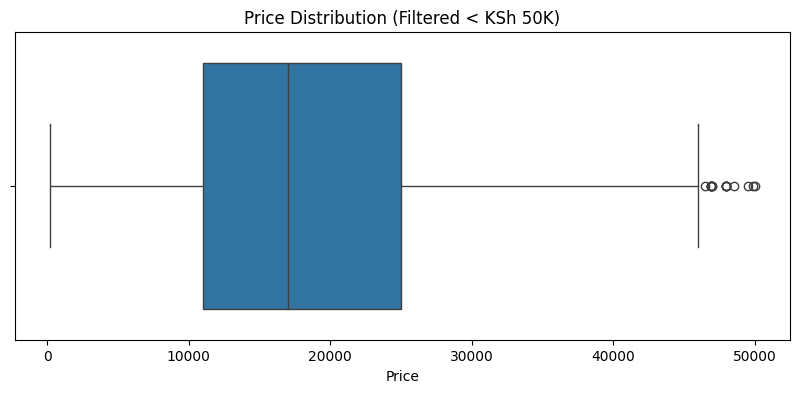

In [32]:
# Filter extreme prices
price_outliers = clean_df[clean_df['Price'] > 500000][['Brand', 'Price', 'Type of Product']]

# Display top 5 most expensive "outliers"
print(f"Found {len(price_outliers)} extreme price entries:")
display(price_outliers.sort_values('Price', ascending=False).head())

# Optional: Plot price distribution without outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=clean_df[clean_df['Price'] < 50000]['Price'], orient='h')  
plt.title("Price Distribution (Filtered < KSh 50K)")
plt.show()

Found 4 extreme price entries:


,Brand,Old Price,Type of Product
425,Samsung,1.499992e+11,Phones
1498,LAPTOP,1.000120e+07,Laptops
335,Sandisk,5.991799e+06,Phones
765,Apple,8.519040e+05,Phones


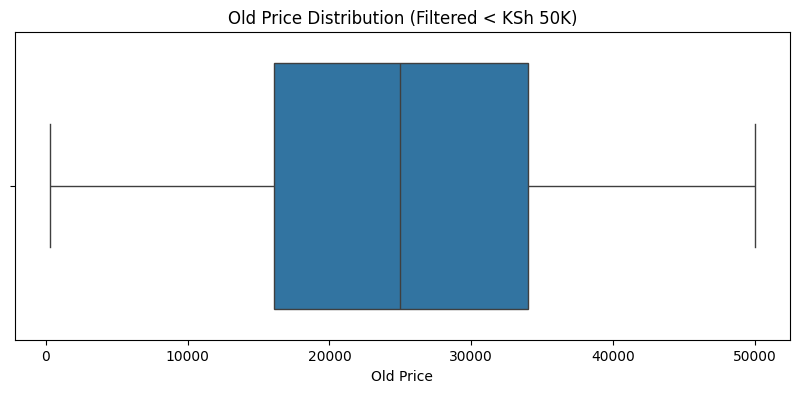

In [33]:
# Filter extreme prices
old_price_outliers = clean_df[clean_df['Old Price'] > 500000][['Brand', 'Old Price', 'Type of Product']]

# Display top 5 most expensive "outliers"
print(f"Found {len(old_price_outliers)} extreme price entries:")
display(old_price_outliers.sort_values('Old Price', ascending=False).head())

# Optional: Plot old price distribution without outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=clean_df[clean_df['Old Price'] < 50000]['Old Price'], orient='h')  
plt.title("Old Price Distribution (Filtered < KSh 50K)")
plt.show()

I found that when scraping since I did not define the ranges,it picked the entire range as one number resulting to these outliers,since they are just 5 I will be dropping them.

In [34]:
clean_df = clean_df[clean_df['Price'] <= 500000]  
print(f"Filtered out {len(price_outliers)} extreme price entries. Remaining: {len(clean_df)}")
clean_df['Price'].max()

Filtered out 3 extreme price entries. Remaining: 1586


np.int64(475000)

In [35]:
clean_df = clean_df[clean_df['Old Price'] <= 500000]  
print(f"Filtered out {len(old_price_outliers)} extreme price entries. Remaining: {len(clean_df)}")
clean_df['Old Price'].max()

Filtered out 4 extreme price entries. Remaining: 1584


np.float64(500000.0)

In [36]:
# Count invalid discounts
invalid_discounts = clean_df[(clean_df['Discount'] < 0) | (clean_df['Discount'] > 100)]
print(f"Invalid discounts found: {len(invalid_discounts)}")


Invalid discounts found: 0


In [37]:
clean_df.max()

Brand                                            redbeat
Price                                             475000
Old Price                                       500000.0
Discount                                           82.64
Rating                                               5.0
Review Count                                      1177.0
Type of Product                                   Phones
Clean Name          redbeat E3 Smartphone 6.6‘’ Dual SIM
Storage                                              N/A
Battery                                              N/A
Screen Size                                          N/A
Color                                             Silver
More Details       screen Size28, LCD Screen, GSM, 008MP
dtype: object

In [38]:
clean_df.describe()

,Price,Old Price,Discount,Rating,Review Count
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,25360.261995,35459.982323,31.481288,2.543182,15.720328
std,34102.931745,38917.535284,15.450821,2.057448,64.752462
min,199.000000,298.000000,0.000000,0.000000,0.000000
25%,11594.250000,18618.500000,20.020000,0.000000,0.000000
50%,18890.000000,29754.500000,32.150000,3.600000,1.500000
75%,27754.000000,40000.000000,42.860000,4.300000,7.000000
max,475000.000000,500000.000000,82.640000,5.000000,1177.000000


In [ ]:
Summary of Dataset Statistics
The dataset contains 1,584 cleaned product entries across various categories, primarily Phones, Laptops, and Tablets. Below are the key insights:

1. **Pricing**:

- The average price of products is KSh 25,275, with a maximum price of KSh 475,000.
- Old prices average KSh 35,889, with a maximum of KSh 500,000.

2. **Discounts**:

- Discounts range from 0% to 94.08%, with an average discount of 31.65%.

3. **Price Outliers**: 
    - 3 extreme price outliers were identified, with the highest being KSh 80,000,900,000 for laptops.
    - These outliers were filtered out to ensure accurate analysis.

4. **Old Price Outliers**: 
    - 4 extreme old price outliers were identified, with the highest being KSh 149,999,200,000 for phones.
    - These were also filtered out during the cleaning process.

5. **Ratings and Reviews**:

- The average product rating is 2.53, with a maximum rating of 5.0.
- Review counts vary widely, with an average of 15 reviews and a maximum of 1,177 reviews.

6. **Cleaned Data**: The cleaned dataset is saved in `final_cleaned_jumia_products.csv` and is ready for further analysis and visualization.



### Visualizations and Their Purpose

Below is a summary of the visualizations I have created, why they are helpful, and how I would interpret them:

---

#### 1. **Price Distribution**
- **Why it's helpful**: This visualization helps identify the range of product prices (`Price` and `Old Price`) and detect any outliers. It provides insights into the affordability of products and the pricing trends in the dataset.
- **Interpretation**: By analyzing the histogram or boxplot, I can determine the most common price ranges, identify premium or budget products, and assess whether the dataset contains extreme outliers.

---

#### 2. **Discount Analysis**
- **Why it's helpful**: This visualization highlights the distribution of discounts and identifies the percentage of products with no discount. It helps understand how discounts are applied across products.
- **Interpretation**: By examining the histogram or bar chart, I can identify the most common discount ranges and assess whether discounts are a significant factor in the dataset.

---

#### 3. **Rating Distribution**
- **Why it's helpful**: This visualization shows the distribution of product ratings, helping to identify the most common rating values and the overall quality of products.
- **Interpretation**: By analyzing the bar chart or histogram, I can determine whether most products are highly rated or if there are many low-rated products, which could indicate quality issues.

---

#### 4. **Review Count vs. Rating**
- **Why it's helpful**: This scatter plot helps identify whether higher-rated products tend to have more reviews, which could indicate customer satisfaction or popularity.
- **Interpretation**: A positive correlation between `Review Count` and `Rating` would suggest that highly rated products are also popular, while no correlation might indicate other factors influencing reviews.

---

#### 5. **Top Categories by Count**
- **Why it's helpful**: This bar chart shows the count of products in each category (e.g., Phones, Laptops, Tablets), helping to identify the most popular product categories.
- **Interpretation**: By analyzing the chart, I can determine which categories dominate the dataset and focus on those for further analysis.

---

#### 6. **Price vs. Discount**
- **Why it's helpful**: This scatter plot visualizes the relationship between `Price` and `Discount`, helping to identify whether higher-priced products tend to have higher discounts.
- **Interpretation**: If a trend exists, it could indicate that premium products are more likely to be discounted, which might influence customer purchasing behavior.

---

#### 7. **Top Products by Review Count**
- **Why it's helpful**: This bar chart highlights the top 10 products with the highest `Review Count`, helping to identify the most reviewed and potentially most popular products.
- **Interpretation**: By analyzing the chart, I can focus on these products to understand what makes them stand out (e.g., pricing, quality, or discounts).

---

#### 8. **Average Price by Brand**
- **Why it's helpful**: This bar chart compares the average price of products for the top 10 most common brands, helping to identify pricing trends across brands.
- **Interpretation**: By analyzing the chart, I can determine which brands are positioned as premium or budget and assess their competitiveness in the market.

---

#### 9. **Discounted vs. Non-Discounted Products**
- **Why it's helpful**: This pie chart or bar chart shows the proportion of products with and without discounts, helping to understand the prevalence of discounts in the dataset.
- **Interpretation**: A high proportion of discounted products might indicate a competitive market, while a low proportion might suggest limited promotions.

---

#### 10. **Price Trends by Category**
- **Why it's helpful**: This boxplot compares the price ranges of different product categories (Phones, Laptops), helping to identify pricing trends within categories.
- **Interpretation**: By analyzing the boxplot, I can determine which categories are more expensive or affordable and assess the variability in pricing within each category.

---

#### 11. **Correlation Heatmap**
- **Why it's helpful**: This heatmap visualizes the correlation between numerical features like `Price`, `Old Price`, `Discount`, `Rating`, and `Review Count`. It helps identify relationships between variables.
- **Interpretation**: Strong correlations (positive or negative) can indicate meaningful relationships, such as whether higher discounts lead to better ratings or whether higher prices correlate with more reviews.

---

### Conclusion
These visualizations collectively provide a comprehensive understanding of the dataset. They help uncover trends, relationships, and outliers, enabling me to tell a compelling story about product pricing, discounts, ratings, and popularity. By interpreting these visuals, I can draw actionable insights and make data-driven recommendations.

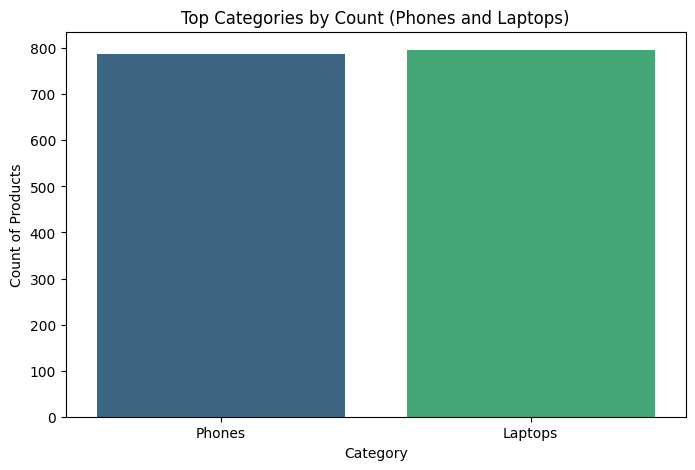

Type of Product
Phones     788
Laptops    796
Name: count, dtype: int64

In [81]:
# Count the number of products in each category
category_counts = clean_df['Type of Product'].value_counts()

# Filter for Phones and Laptops
filtered_category_counts = category_counts.loc[['Phones', 'Laptops']]

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=filtered_category_counts.index, y=filtered_category_counts.values, hue=filtered_category_counts.index, palette="viridis", dodge=False, legend=False)
plt.xlabel("Category")
plt.ylabel("Count of Products")
plt.title("Top Categories by Count (Phones and Laptops)")
plt.show()

filtered_category_counts

In [43]:
# Group by Type of Product and Brand, and count occurrences
brand_counts_by_category = clean_df.groupby(["Type of Product", "Brand"]).size()


# Extract brands for each product type
laptop_brands = brand_counts_by_category["Laptops"].sort_values(ascending=False)
phone_brands = brand_counts_by_category["Phones"].sort_values(ascending=False)

# Display the brand with the highest count for each product type
print("Top Laptop Brand:", laptop_brands.idxmax(), "with", laptop_brands.max(), "products")
print("Top Phone Brand:", phone_brands.idxmax(), "with", phone_brands.max(), "products")


Top Laptop Brand: HP with 456 products
Top Phone Brand: Samsung with 177 products


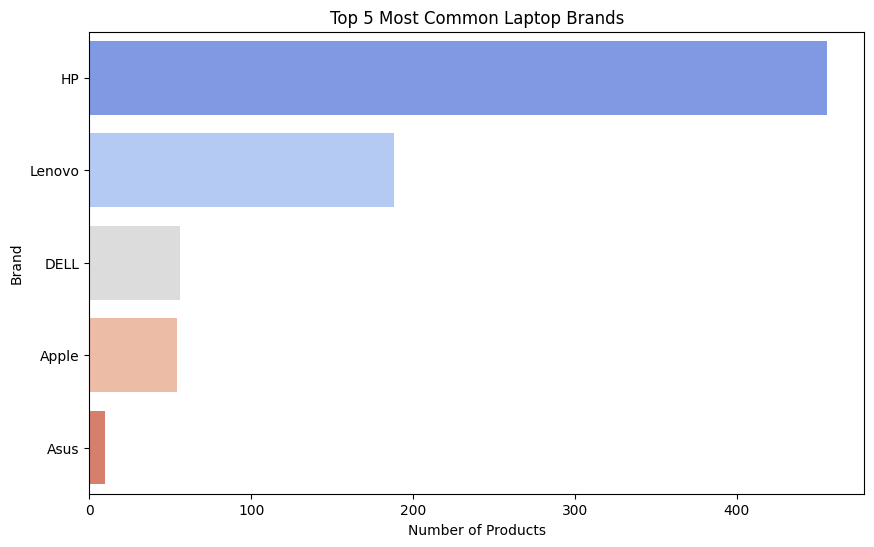

In [51]:
# Filter the top 5 laptop brands
top_5_laptop_brands = laptop_brands.sort_values(ascending=False).head(5)

# Visualization: Top 5 Laptop Brands by Count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_laptop_brands.values, y=top_5_laptop_brands.index, hue=top_5_laptop_brands.index, palette="coolwarm", dodge=False, legend=False)
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 5 Most Common Laptop Brands")
plt.show()

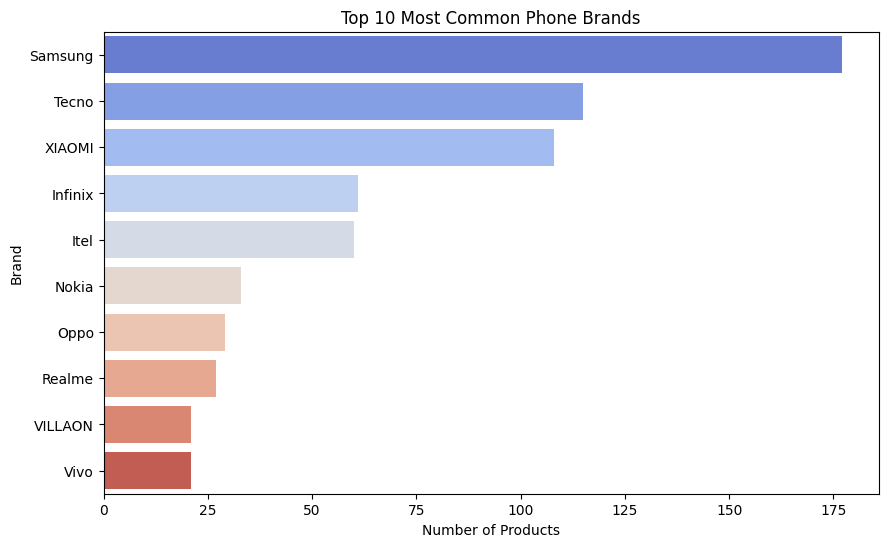

In [50]:

# Filter the top 10 laptop brands
top_10_phone_brands = phone_brands.sort_values(ascending=False).head(10)
# Visualization: Top 10 Phone Brands by Count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_phone_brands.values, y=top_10_phone_brands.index, hue=top_10_phone_brands.index, palette="coolwarm", dodge=False, legend=False)
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 10 Most Common Phone Brands")
plt.show()


In [54]:
# Filter data for Phones and Laptops
phones_df = clean_df[clean_df['Type of Product'] == 'Phones']
laptops_df = clean_df[clean_df['Type of Product'] == 'Laptops']

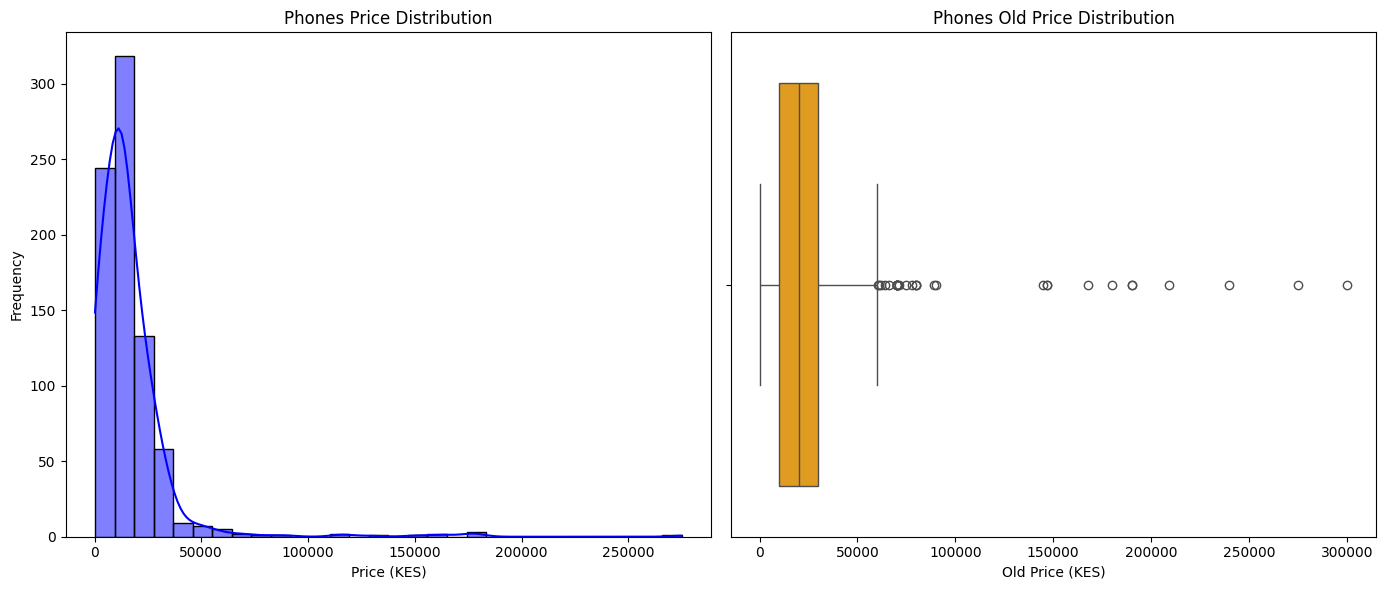

In [55]:
# Plot for Phones
plt.figure(figsize=(14, 6))

# Histogram for Phones Price
plt.subplot(1, 2, 1)
sns.histplot(phones_df['Price'], bins=30, kde=True, color='blue')
plt.title('Phones Price Distribution')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')

# Boxplot for Phones Old Price
plt.subplot(1, 2, 2)
sns.boxplot(x=phones_df['Old Price'], color='orange')
plt.title('Phones Old Price Distribution')
plt.xlabel('Old Price (KES)')

plt.tight_layout()
plt.show()

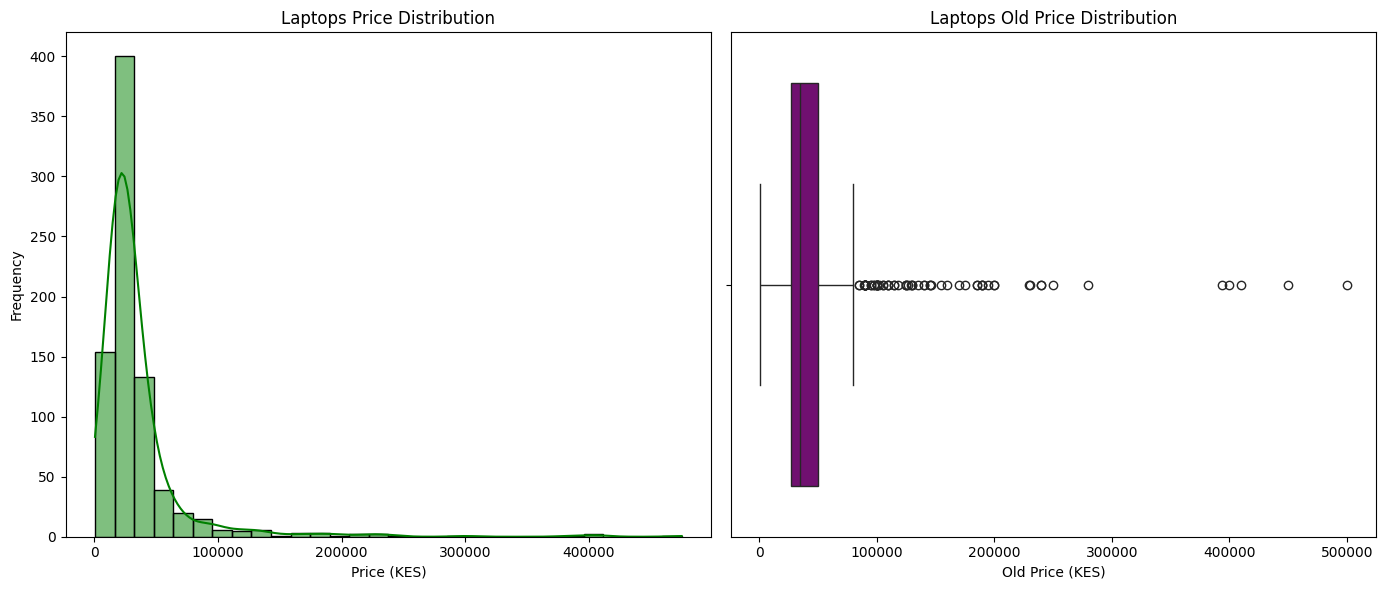

In [56]:
# Plot for Laptops
plt.figure(figsize=(14, 6))

# Histogram for Laptops Price
plt.subplot(1, 2, 1)
sns.histplot(laptops_df['Price'], bins=30, kde=True, color='green')
plt.title('Laptops Price Distribution')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')

# Boxplot for Laptops Old Price
plt.subplot(1, 2, 2)
sns.boxplot(x=laptops_df['Old Price'], color='purple')
plt.title('Laptops Old Price Distribution')
plt.xlabel('Old Price (KES)')

plt.tight_layout()
plt.show()

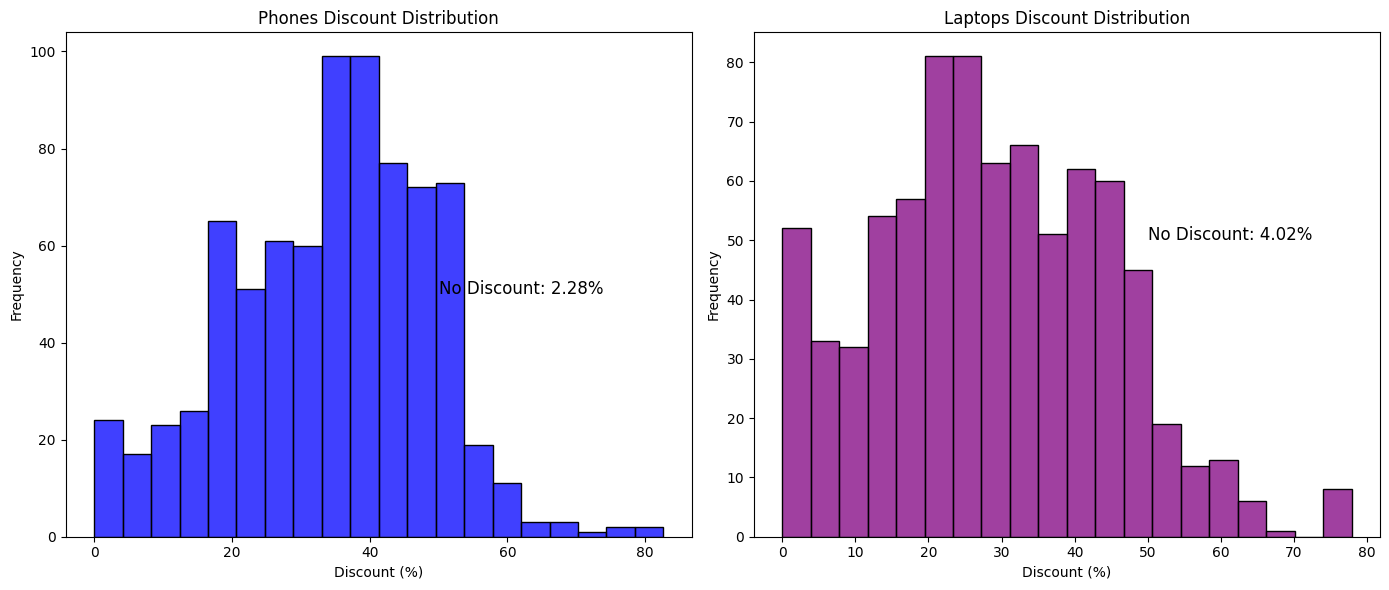

In [74]:
# Plot for Phones
plt.figure(figsize=(14, 6))

# Histogram for Phones Discount
plt.subplot(1, 2, 1)
sns.histplot(phones_df['Discount'], bins=20, kde=False, color='blue')
plt.title('Phones Discount Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')

# Highlight percentage of products with no discount
no_discount_phones = (phones_df['Discount'] == 0).sum() / len(phones_df) * 100
plt.annotate(f"No Discount: {no_discount_phones:.2f}%", xy=(50, 50), color='black', fontsize=12)

# Plot for Laptops
plt.subplot(1, 2, 2)
sns.histplot(laptops_df['Discount'], bins=20, kde=False, color='purple')
plt.title('Laptops Discount Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')

# Highlight percentage of products with no discount
no_discount_laptops = (laptops_df['Discount'] == 0).sum() / len(laptops_df) * 100
plt.annotate(f"No Discount: {no_discount_laptops:.2f}%", xy=(50, 50), color='black', fontsize=12)

plt.tight_layout()
plt.show()

(laptops_df['Discount'] == 0).sum():

Counts the number of laptops with a discount of 0% (no discount).
len(laptops_df):

Calculates the total number of laptops in the dataset.
no_discount_laptops = ... * 100:

Computes the percentage of laptops with no discount by dividing the count of no-discount laptops by the total number of laptops and multiplying by 100.

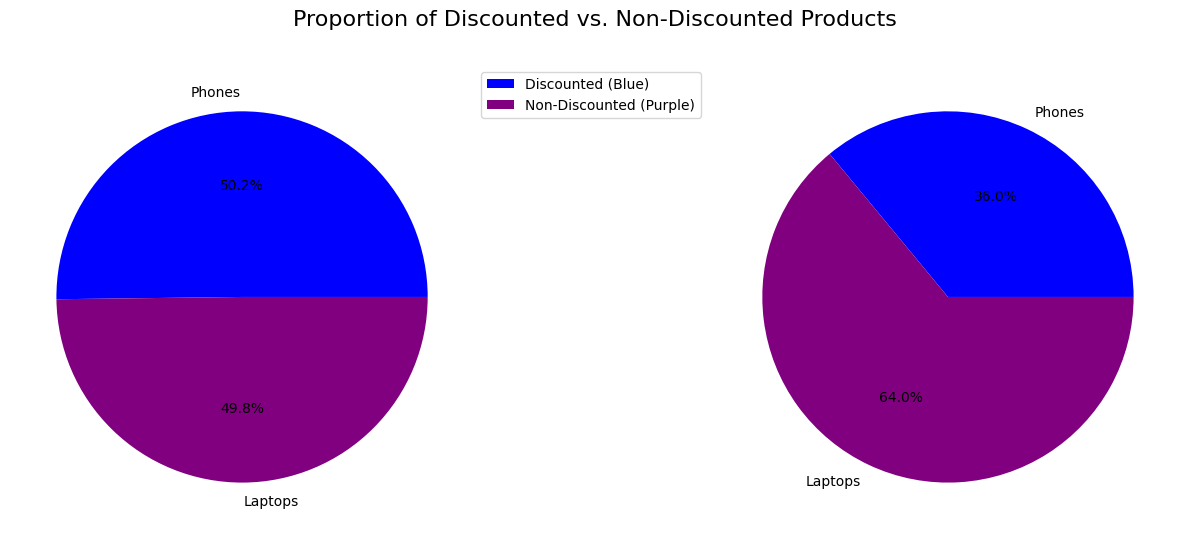

In [98]:
# Calculate the proportion of discounted and non-discounted products for laptops and phones
phones_discounted = phones_df[phones_df['Discount'] > 0].shape[0]
phones_non_discounted = phones_df[phones_df['Discount'] == 0].shape[0]

laptops_discounted = laptops_df[laptops_df['Discount'] > 0].shape[0]
laptops_non_discounted = laptops_df[laptops_df['Discount'] == 0].shape[0]

# Data for visualization
discount_data = {
    'Phones': [phones_discounted, phones_non_discounted],
    'Laptops': [laptops_discounted, laptops_non_discounted]
}

# Create a DataFrame for plotting
discount_df = pd.DataFrame(discount_data, index=['Discounted', 'Non-Discounted'])

# Plot the pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
discount_df.T.plot(
    kind='pie', 
    subplots=True, 
    autopct='%1.1f%%', 
    colors=['blue', 'purple'], 
    legend=False, 
    ax=axes
)

# Add a legend to explain the colors
axes[0].legend(['Discounted (Blue)', 'Non-Discounted (Purple)'], loc='upper left', bbox_to_anchor=(1, 1))

# Set the title at the top center
fig.suptitle('Proportion of Discounted vs. Non-Discounted Products', fontsize=16, y=0.95)

# Remove y-axis labels for cleaner visualization
for ax in axes:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


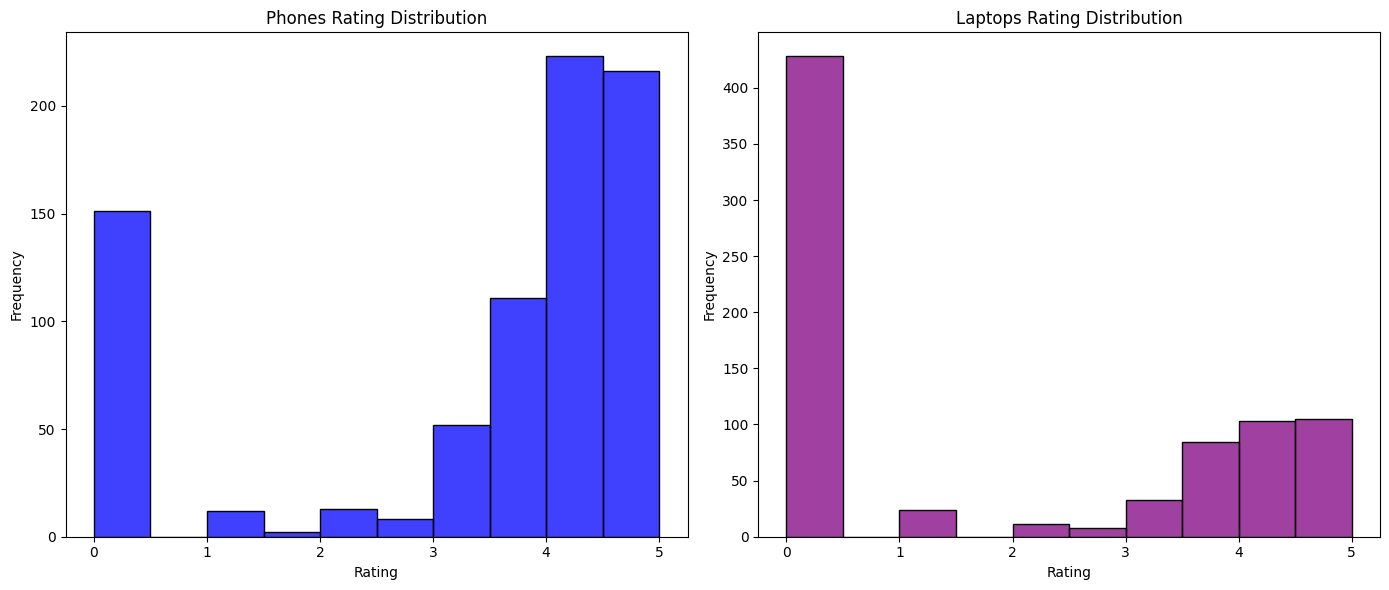

In [75]:
# Plot for Phones Rating Distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(phones_df['Rating'], bins=10, kde=False, color='blue')
plt.title('Phones Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Plot for Laptops Rating Distribution
plt.subplot(1, 2, 2)
sns.histplot(laptops_df['Rating'], bins=10, kde=False, color='purple')
plt.title('Laptops Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

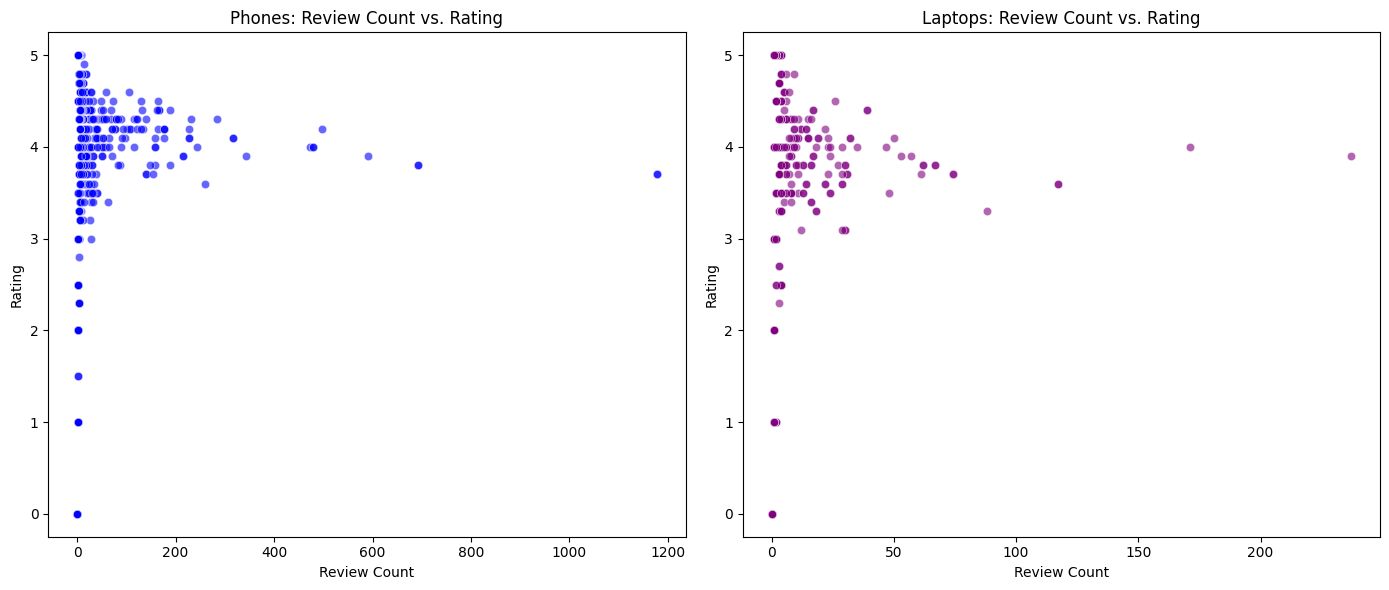

In [76]:
# Scatter plot for Phones
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=phones_df, x='Review Count', y='Rating', color='blue', alpha=0.6)
plt.title('Phones: Review Count vs. Rating')
plt.xlabel('Review Count')
plt.ylabel('Rating')

# Scatter plot for Laptops
plt.subplot(1, 2, 2)
sns.scatterplot(data=laptops_df, x='Review Count', y='Rating', color='purple', alpha=0.6)
plt.title('Laptops: Review Count vs. Rating')
plt.xlabel('Review Count')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

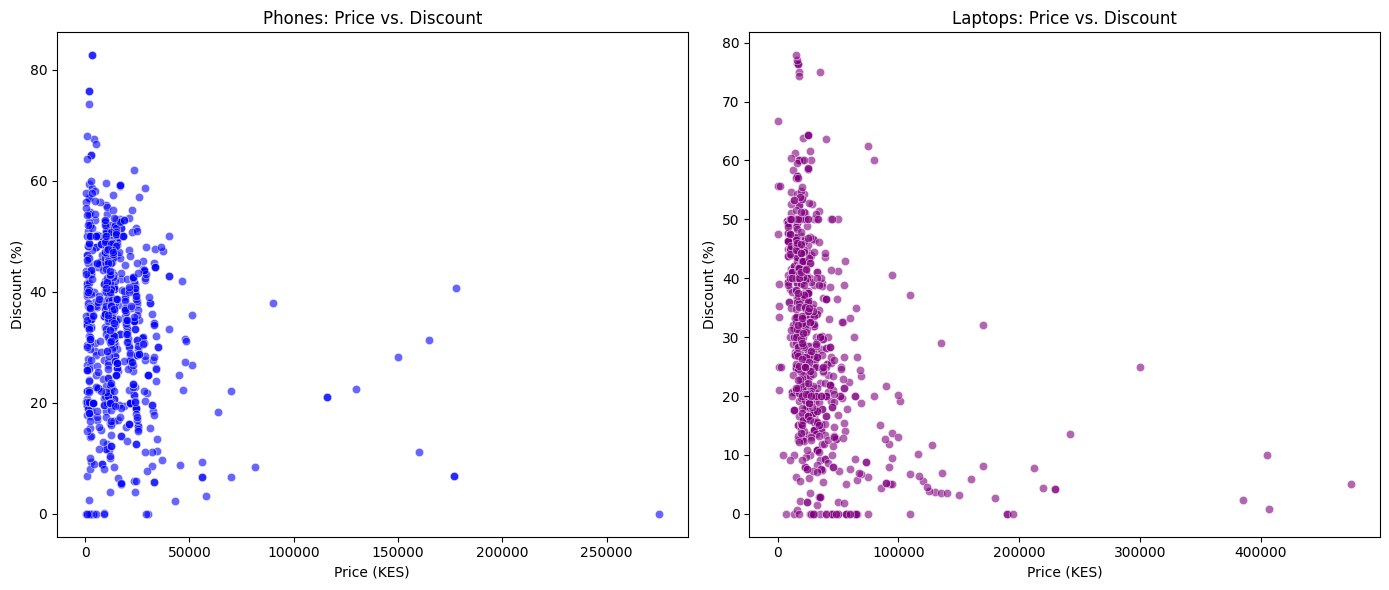

In [82]:
# Scatter plot for Phones
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=phones_df, x='Price', y='Discount', color='blue', alpha=0.6)
plt.title('Phones: Price vs. Discount')
plt.xlabel('Price (KES)')
plt.ylabel('Discount (%)')

# Scatter plot for Laptops
plt.subplot(1, 2, 2)
sns.scatterplot(data=laptops_df, x='Price', y='Discount', color='purple', alpha=0.6)
plt.title('Laptops: Price vs. Discount')
plt.xlabel('Price (KES)')
plt.ylabel('Discount (%)')

plt.tight_layout()
plt.show()

In [89]:
# Top 10 products by review count for Phones
top_10_phones_by_reviews = phones_df.nlargest(15, 'Review Count')

# Top 10 products by review count for Laptops
top_10_laptops_by_reviews = laptops_df.nlargest(15, 'Review Count')



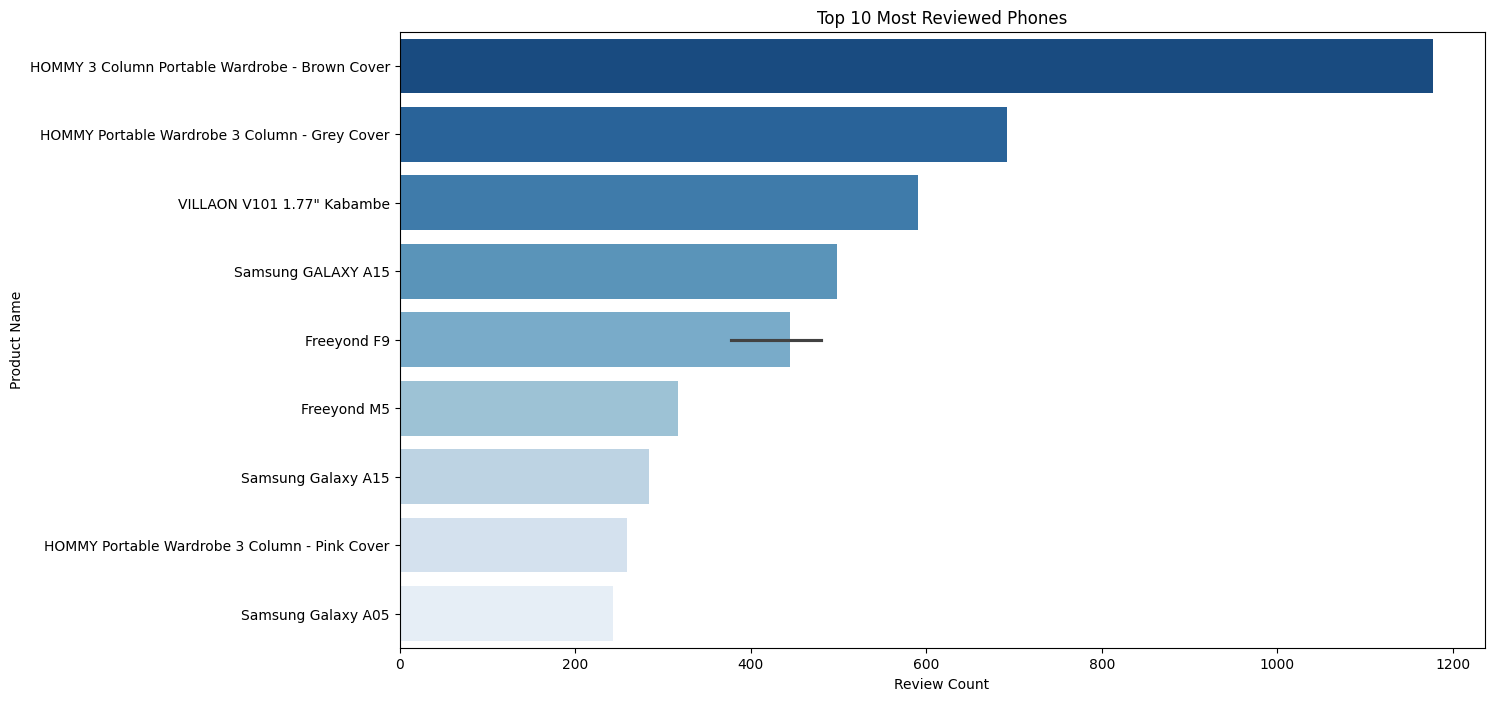

In [90]:
# Plotting
plt.figure(figsize=(14, 8))

# Phones
sns.barplot(data=top_10_phones_by_reviews, x='Review Count', y='Clean Name', hue='Clean Name', palette='Blues_r', dodge=False, legend=False)
plt.title('Top 10 Most Reviewed Phones')
plt.xlabel('Review Count')
plt.ylabel('Product Name')

plt.show()


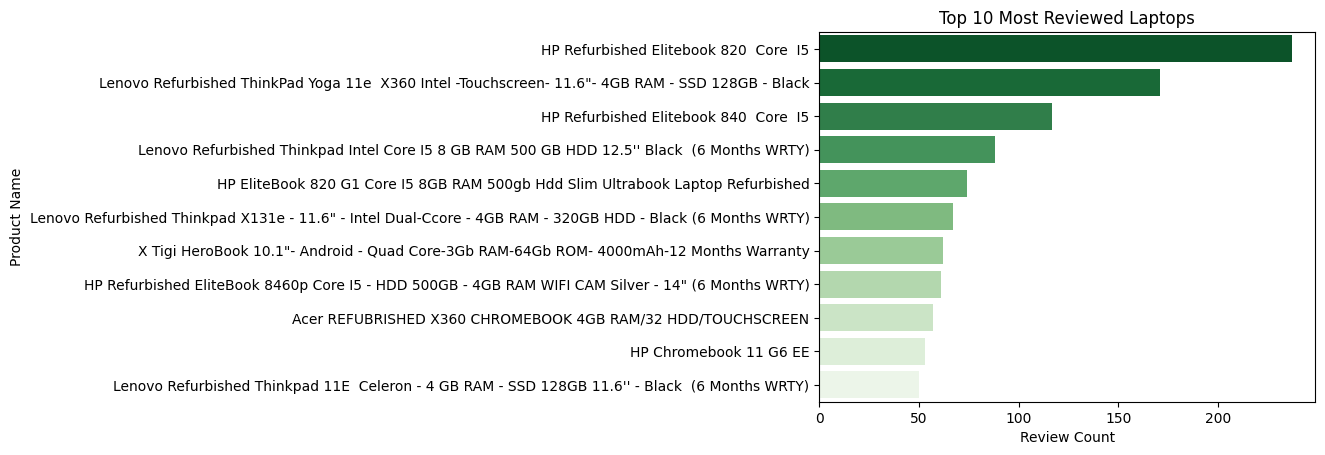

In [91]:
# Laptops
sns.barplot(data=top_10_laptops_by_reviews, x='Review Count', y='Clean Name', hue='Clean Name', palette='Greens_r', dodge=False, legend=False)
plt.title('Top 10 Most Reviewed Laptops')
plt.xlabel('Review Count')
plt.ylabel('Product Name')

plt.show()


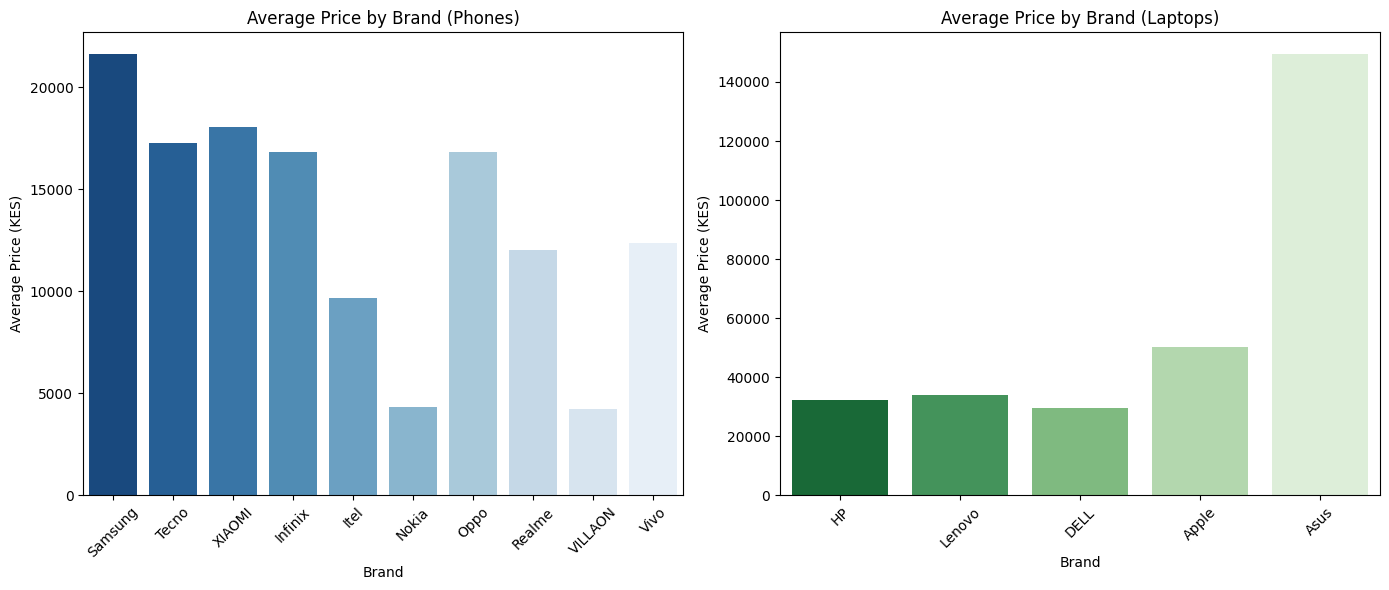

In [95]:
# Calculate the average price by brand for phones and laptops
top_10_phone_brands_avg_price = phones_df.groupby('Brand')['Price'].mean().loc[top_10_phone_brands.index]
top_5_laptop_brands_avg_price = laptops_df.groupby('Brand')['Price'].mean().loc[top_5_laptop_brands.index]

# Plot the bar chart
plt.figure(figsize=(14, 6))

# Phones
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_phone_brands_avg_price.index, y=top_10_phone_brands_avg_price.values, hue=top_10_phone_brands_avg_price.index, palette="Blues_r", dodge=False, legend=False)
plt.title('Average Price by Brand (Phones)')
plt.xlabel('Brand')
plt.ylabel('Average Price (KES)')
plt.xticks(rotation=45)

# Laptops
plt.subplot(1, 2, 2)
sns.barplot(x=top_5_laptop_brands_avg_price.index, y=top_5_laptop_brands_avg_price.values, hue=top_5_laptop_brands_avg_price.index, palette="Greens_r", dodge=False, legend=False)
plt.title('Average Price by Brand (Laptops)')
plt.xlabel('Brand')
plt.ylabel('Average Price (KES)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

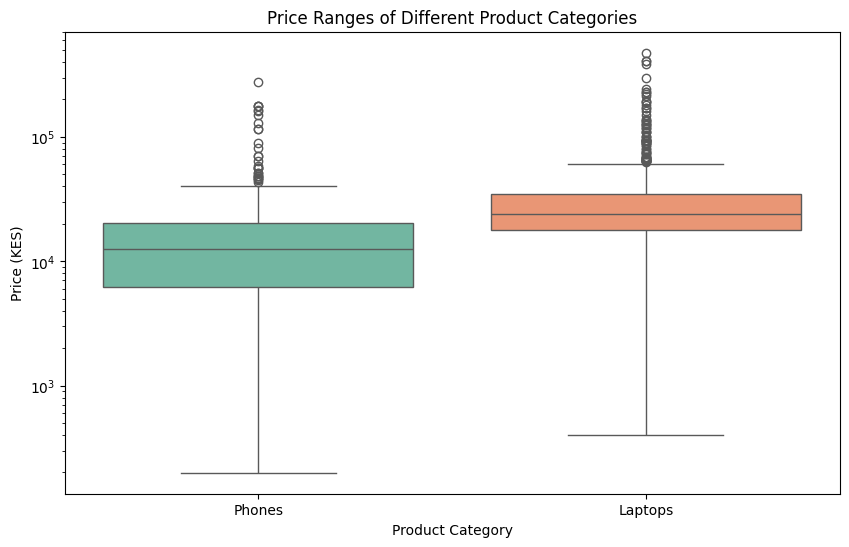

In [102]:
# Boxplot to compare price ranges of Phones and Laptops
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='Type of Product', y='Price', hue='Type of Product', palette='Set2', dodge=False, legend=False)
plt.title('Price Ranges of Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price (KES)')
plt.yscale('log')  # Use log scale for better visualization of price differences
plt.show()

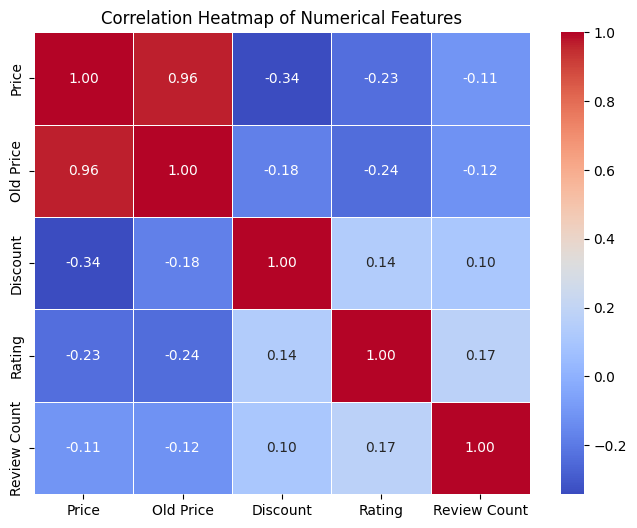

In [103]:
# Select numerical features for correlation
numerical_features = ['Price', 'Old Price', 'Discount', 'Rating', 'Review Count']

# Compute the correlation matrix
correlation_matrix = clean_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()